Text(0.5, 1.0, 'Population since 1790')

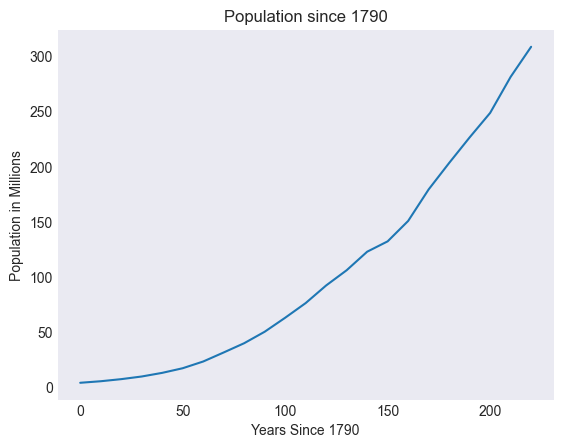

In [2]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from cwd import getPath

os.chdir(getPath())

#Set plot style
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-v0_8-dark')

#A)
us_pop_df = pd.read_csv("us_pop_data.csv") 
us_pop_df["delta_year"] = us_pop_df["year"] - 1790
us_pop_df["pop_millions"] = us_pop_df["us_pop"].apply(lambda x: round(x/1_000_000, 1))


#B)
plt.plot(us_pop_df["delta_year"], us_pop_df["pop_millions"])
plt.xlabel("Years Since 1790")
plt.ylabel("Population in Millions")
plt.title("Population since 1790")

In [19]:
#Set up train and test data for both C & E
delta_year = np.array(us_pop_df["delta_year"]).reshape(-1,1)
pop_mil = us_pop_df["pop_millions"]
pop_mil_train = pop_mil[:18]
delta_year_train = delta_year[:18]
pop_mil_test = pop_mil[18:]
delta_year_test = delta_year[18:]

#C)
reg_model = linear_model.LinearRegression()
reg_model.fit(delta_year_train, pop_mil_train)
pop_mil_pred = reg_model.predict(delta_year_test)
rsquared_reg_model = r2_score(pop_mil_test, pop_mil_pred)

#D)
us_pop_df["delta_year_sq"] = us_pop_df["delta_year"].apply(lambda x: x**2)

#E)
sq_delta = np.array(us_pop_df["delta_year_sq"]).reshape(-1,1)
sq_delta_train = sq_delta[:18]
sq_delta_test = sq_delta[18:]

squared_model = linear_model.LinearRegression()
squared_model.fit(sq_delta_train, pop_mil_train)
sq_pop_mil_pred = squared_model.predict(sq_delta_test)
rsquared_sq_model = r2_score(pop_mil_test, sq_pop_mil_pred)

print(f'Regular Model R Squared Score: {rsquared_reg_model} | Squared Model R Squared Score: {rsquared_sq_model}')


Regular Model R Squared Score: -3.396705522332269 | Squared Model R Squared Score: 0.8931445394864372


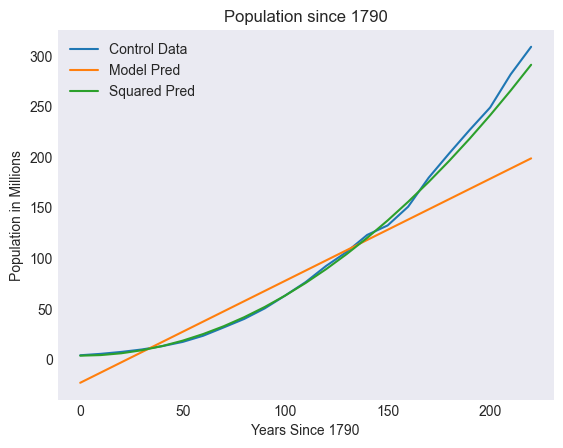

In [28]:
#F)
plt.plot(us_pop_df["delta_year"], pop_mil, label="Control Data")
plt.plot(us_pop_df["delta_year"], reg_model.predict(delta_year), label="Model Pred")
plt.plot(us_pop_df["delta_year"], squared_model.predict(sq_delta), label="Squared Pred")
plt.xlabel("Years Since 1790")
plt.ylabel("Population in Millions")
plt.title("Population since 1790")
plt.legend()

Based on the plotted models, I believe that the Squared Prediction fits this better. It aligns much more nicely with the control data, and more importantly it is also exponential unlike the regular prediction.

(array([  1.,   2.,   6.,   8.,  53., 103., 153.,  86.,  20.,   8.]),
 array([ 6.80682936,  7.34669917,  7.88656899,  8.4264388 ,  8.96630862,
         9.50617843, 10.04604824, 10.58591806, 11.12578787, 11.66565768,
        12.2055275 ]),
 <BarContainer object of 10 artists>)

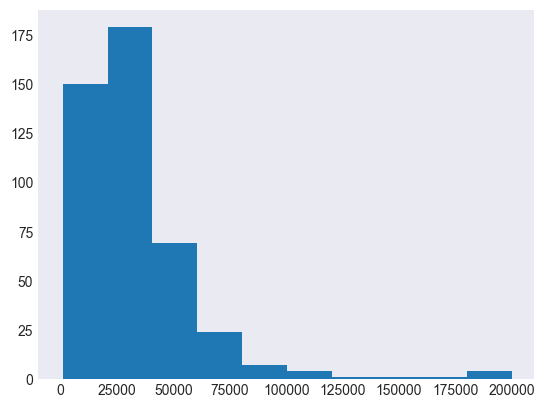

In [32]:
#A)
spend_data = pd.read_csv("customer_spending.csv")
plt.hist(spend_data)


(array([  1.,   2.,   6.,   8.,  53., 103., 153.,  86.,  20.,   8.]),
 array([ 6.80682936,  7.34669917,  7.88656899,  8.4264388 ,  8.96630862,
         9.50617843, 10.04604824, 10.58591806, 11.12578787, 11.66565768,
        12.2055275 ]),
 <BarContainer object of 10 artists>)

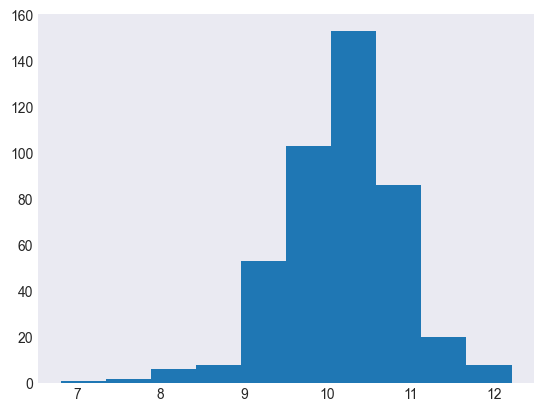

In [33]:
#B)
log_spend_data = spend_data["ann_spending"].apply(lambda x: np.log(x))

#C)
plt.hist(log_spend_data)

D)
So the first data set has a rather weight distribution to the left of the graph, but varies through the rest. It isn't uniform really, nor is it especially easy to intrepret as is for statstics. By applying the log function the dataset, we transform it into a distribution like that of a binomrial distribution. It is easier to process statistically and programatically.